In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
batch_size = 50
train_datagen = ImageDataGenerator(rescale=1./64,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./64)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN4/bahan/', classes = ["negeri","swasta","buruh"],
                                              target_size=(150, 150), batch_size=batch_size,
                                              class_mode='categorical', shuffle=True)

Found 677 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN4/latih', classes = ["negeri","swasta","buruh"],
                                            target_size=(150, 150), batch_size=batch_size,
                                            class_mode='categorical', shuffle=False)

In [ ]:
#CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# dense
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

In [ ]:
History = model.fit(train_set, validation_data = test_set, batch_size=batch_size,epochs=100,callbacks=[history])

Epoch 1/100
14/14 [==============================] - 99s 6s/step - loss: 0.6174 - accuracy: 0.7223 - val_loss: 0.9858 - val_accuracy: 0.5150
Epoch 2/100
14/14 [==============================] - 77s 5s/step - loss: 0.6287 - accuracy: 0.7208 - val_loss: 0.6070 - val_accuracy: 0.7784
Epoch 3/100
14/14 [==============================] - 72s 5s/step - loss: 0.5744 - accuracy: 0.7533 - val_loss: 0.6481 - val_accuracy: 0.7545
Epoch 4/100
14/14 [==============================] - 77s 5s/step - loss: 0.5197 - accuracy: 0.7651 - val_loss: 0.9205 - val_accuracy: 0.5868
Epoch 5/100
14/14 [==============================] - 77s 5s/step - loss: 0.5415 - accuracy: 0.7696 - val_loss: 0.8315 - val_accuracy: 0.6347
Epoch 6/100
14/14 [==============================] - 77s 5s/step - loss: 0.5656 - accuracy: 0.7666 - val_loss: 0.7239 - val_accuracy: 0.6467
Epoch 7/100
14/14 [==============================] - 73s 5s/step - loss: 0.5989 - accuracy: 0.7415 - val_loss: 0.6925 - val_accuracy: 0.7066
Epoch 8/100
1

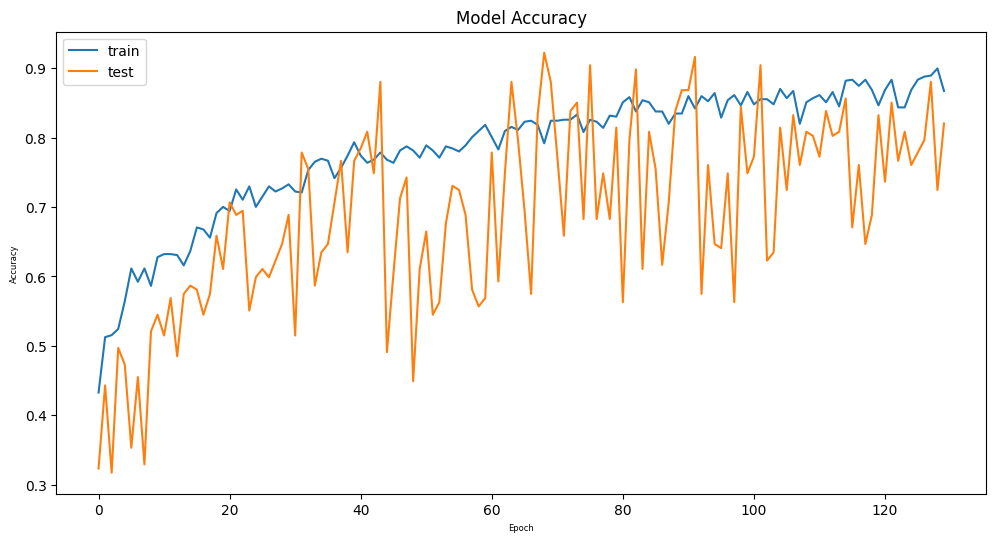

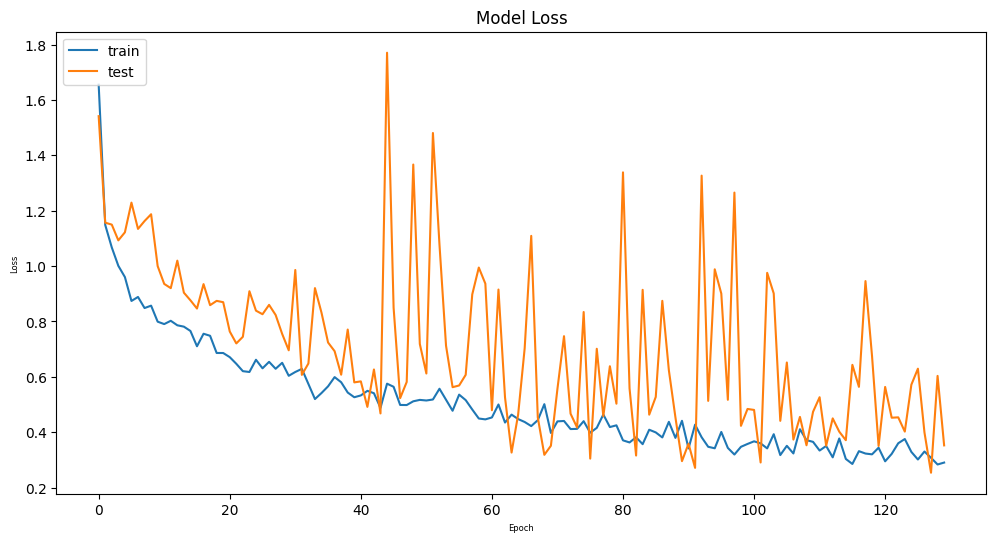

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=12)
plt.ylabel('Accuracy', fontsize=6)
plt.xlabel('Epoch', fontsize=6)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(12,6))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=12)
plt.ylabel('Loss',fontsize=6)
plt.xlabel('Epoch',fontsize=6)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
target_names = []
for key in train_set.class_indices:
  target_names.append(key)

print(target_names)

['negeri', 'swasta', 'buruh']


In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])

4/4 [==============================] - 7s 1s/step - loss: 0.3524 - accuracy: 0.8204
n Test_Accuracy:- 0.8203592896461487


4/4 [==============================] - 6s 1s/step
confusion matrix
[[48  0  2]
 [ 0 50  0]
 [ 5 23 39]]


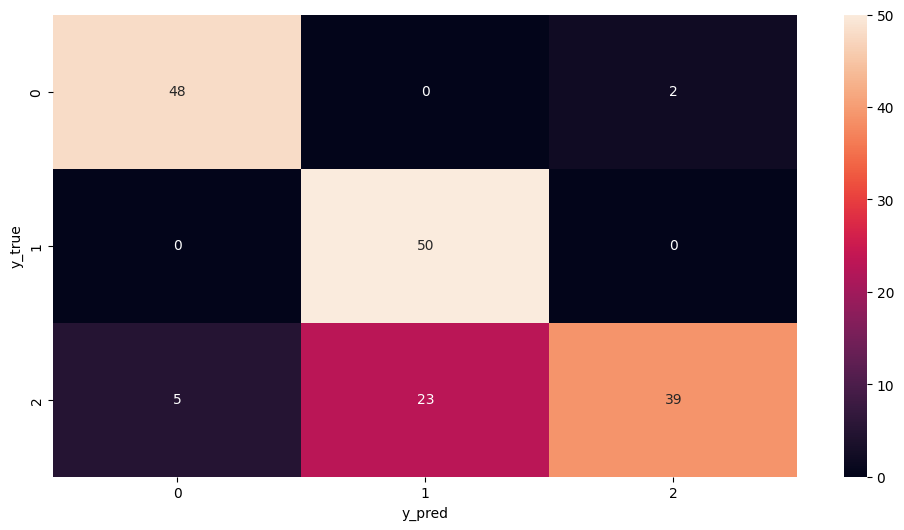

In [ ]:
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))


Classification Report
              precision    recall  f1-score   support

      negeri       0.91      0.96      0.93        50
      swasta       0.68      1.00      0.81        50
       buruh       0.95      0.58      0.72        67

    accuracy                           0.82       167
   macro avg       0.85      0.85      0.82       167
weighted avg       0.86      0.82      0.81       167



Saving Gho Sky 2.png to Gho Sky 2.png
1/1 [==============================] - 0s 37ms/step
Gho Sky 2.png
swasta


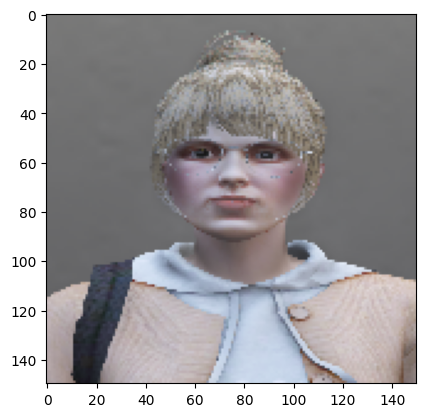

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=50)
  classes = np.argmax(classes)

  print(fn)
  if classes==0:
    print('negeri')
  elif classes==1:
    print('swasta')
  else:
    print('buruh')